In [15]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("C:\\Users\\PMLS\\Downloads\\archive (14)\\Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# Renaming The Columns Name
df.rename(columns={'Genre':'Gender'},inplace=True)

In [8]:
# Dropping Irrelevant Columns
df.drop(columns='CustomerID',inplace=True)

In [11]:
# Encoding Categorical Columns
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])


In [13]:
# Sclaing  the Data
scalar=StandardScaler()
df_scaled=scalar.fit_transform(df)
df_scaled

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

In [24]:
# Applying PCA to reduce dimensions
pca=PCA(n_components=2)
df_pca=pca.fit_transform(df_scaled)
df_pca=pd.DataFrame(df_pca,columns=['PC1','PC2'])

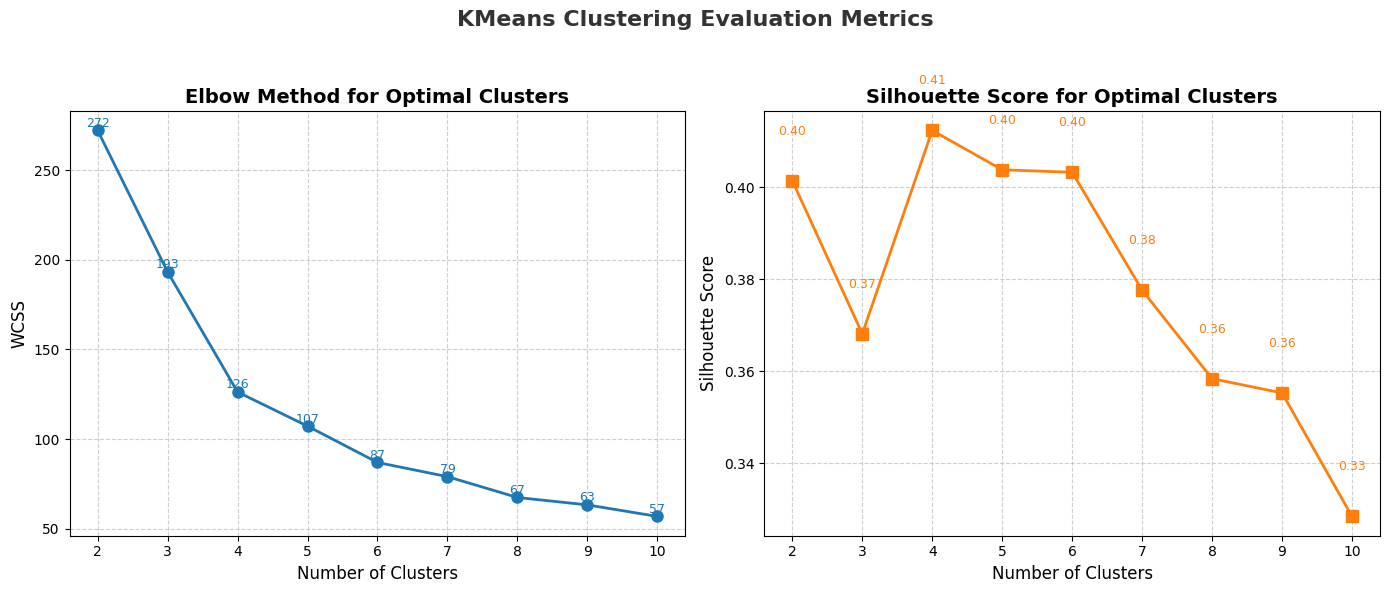

In [25]:
# Applying Methid to Identify Optimal Number of Clusters
wcss = []
silhoutete_scores = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)
    silhoutete_scores.append(silhouette_score(df_pca, kmeans.labels_))

# Plotting the Elbow Method
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(range(2, 11), wcss, marker='o', linestyle='-', color='#1f77b4', linewidth=2, markersize=8)
plt.title('Elbow Method for Optimal Clusters', fontsize=14, fontweight='bold')
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('WCSS', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
for i, v in enumerate(wcss):
    plt.text(i+2, v+2, f"{v:.0f}", ha='center', fontsize=9, color='#1f77b4')

# Plotting the Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhoutete_scores, marker='s', linestyle='-', color='#ff7f0e', linewidth=2, markersize=8)
plt.title('Silhouette Score for Optimal Clusters', fontsize=14, fontweight='bold')
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
for i, v in enumerate(silhoutete_scores):
    plt.text(i+2, v+0.01, f"{v:.2f}", ha='center', fontsize=9, color='#ff7f0e')

plt.suptitle('KMeans Clustering Evaluation Metrics', fontsize=16, fontweight='bold', color='#333')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


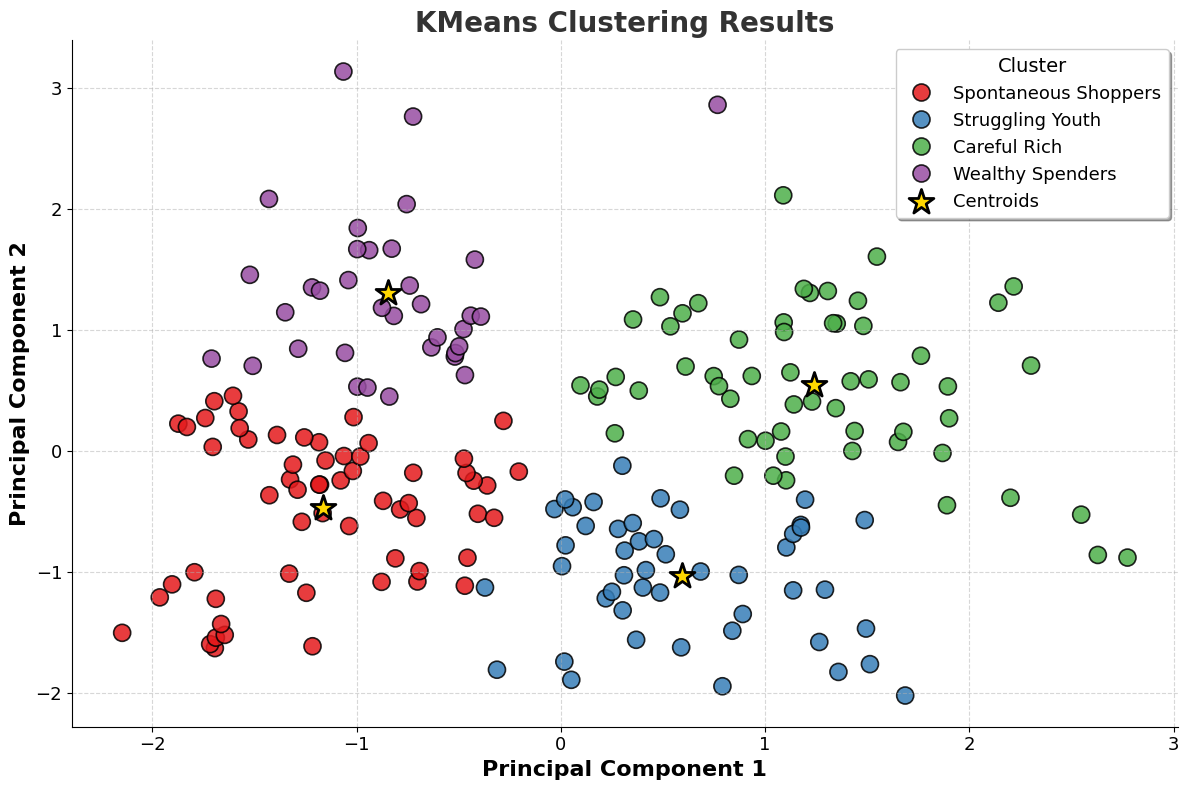

In [26]:
kmeans=KMeans(n_clusters=4,random_state=42)
kmeans.fit(df_pca)
df_pca['Cluster'] = kmeans.labels_
df_pca['Cluster']=df_pca['Cluster'].map( {0: 'Careful Rich',
    1: 'Struggling Youth',
    2: 'Spontaneous Shoppers',
    3: 'Wealthy Spenders'})
# Plotting the Clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_pca, x='PC1', y='PC2', hue='Cluster', palette='Set1', s=150, alpha=0.85, edgecolor='black', linewidth=1.2
)
# Plot cluster centers
centers = kmeans.cluster_centers_
plt.scatter(
    centers[:, 0], centers[:, 1], c='gold', s=350, marker='*', label='Centroids', edgecolor='black', linewidth=2, zorder=10
)
plt.title('KMeans Clustering Results', fontsize=20, fontweight='bold', color='#333')
plt.xlabel('Principal Component 1', fontsize=16, fontweight='bold')
plt.ylabel('Principal Component 2', fontsize=16, fontweight='bold')
plt.legend(title='Cluster', fontsize=13, title_fontsize=14, loc='upper right', frameon=True, shadow=True)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
sns.despine()
plt.tight_layout()
plt.show()
# Saving the Clustered Data
#

In [27]:
cluster_labels={
    0: 'Careful Rich',
    1: 'Struggling Youth',
    2: 'Spontaneous Shoppers',
    3: 'Wealthy Spenders'
}
df['Segments']=df['Clustrs'].map(cluster_labels)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clustrs,Segments
0,1,19,15,39,2,Spontaneous Shoppers
1,1,21,15,81,2,Spontaneous Shoppers
2,0,20,16,6,1,Struggling Youth
3,0,23,16,77,2,Spontaneous Shoppers
4,0,31,17,40,1,Struggling Youth
...,...,...,...,...,...,...
195,0,35,120,79,3,Wealthy Spenders
196,0,45,126,28,0,Careful Rich
197,1,32,126,74,3,Wealthy Spenders
198,1,32,137,18,3,Wealthy Spenders
